Plots of the field values along the magnet, as well as effective length measurement

In [4]:
from HalbachLensClass import HalbachLens
import numpy as np
import matplotlib.pyplot as plt
rb=.05
Lm=.1524
lens=HalbachLens(Lm,(.0254,1.5*.0254),(rb,rb+.0254))
zArr=np.linspace(-Lm*1.5,Lm*1.5,301)



def BNormGrad_Along_Line(x0,y0=0):
    assert np.sqrt(x0**2+y0**2)<rb
    valList = []
    coords=np.column_stack((np.ones(len(zArr))*x0,np.ones(len(zArr))*y0,zArr ))
    valList=lens.BNorm_Gradient(coords)[:,0]
    # for z in zArr:
    #     valList.append(lens.BNorm_Gradient(np.asarray([x0,y0,z]))[0] )
    return np.asarray(valList)

def Bx_Along_Line(x0,y0=0):
    assert np.sqrt(x0**2+y0**2)<rb
    coords=np.column_stack((np.ones(len(zArr))*x0,np.ones(len(zArr))*y0,zArr ))
    valList=lens.B_Vec(coords)[:,0]
    return np.asarray(valList)

def BNorm_Along_Line(x0,y0=0):
    assert np.sqrt(x0**2+y0**2)<rb
    coords=np.column_stack((np.ones(len(zArr))*x0,np.ones(len(zArr))*y0,zArr ))
    valList=lens.BNorm(coords)
    return np.asarray(valList)


def effectiveLength(x0,which,y0=0.0):
    if which=='Bx':
        valList=Bx_Along_Line(x0,y0=y0)
    elif which=='BNorm':
        valList=BNorm_Along_Line(x0,y0=y0)
    elif which=='BNormGrad':
        valList=BNormGrad_Along_Line(x0,y0=y0)
    else:
        raise ValueError
    centerIndex=np.argmin(np.abs(zArr-0))
    peakVal=valList[centerIndex]
    Lef=np.trapz(valList,x=zArr)/peakVal
    return Lef


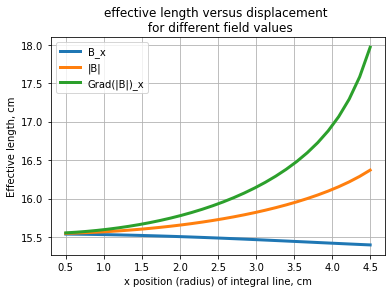

In [5]:
#plot of effective length for different metric
xArr=np.linspace(.005,.045,30)
yPlotBx=np.asarray([effectiveLength(x,'Bx') for x in xArr])
yPlotNorm=np.asarray([effectiveLength(x,'BNorm') for x in xArr])
yPlotBNormGrad=np.asarray([effectiveLength(x,'BNormGrad') for x in xArr])

plt.title('effective length versus displacement \n for different field values')
plt.plot(xArr*1e2,1e2*yPlotBx,label='B_x',linewidth=3)
plt.plot(xArr*1e2,1e2*yPlotNorm,label='|B|',linewidth=3)
plt.plot(xArr*1e2,1e2*yPlotBNormGrad,label='Grad(|B|)_x',linewidth=3)
plt.xlabel('x position (radius) of integral line, cm')
plt.legend()
plt.ylabel('Effective length, cm')
plt.grid()
plt.show()

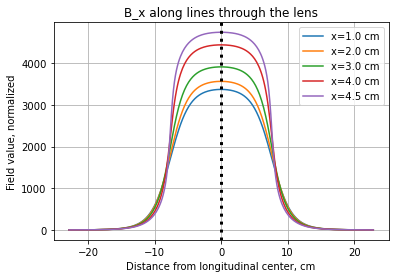

In [6]:
# Bx fringe field
xArr=np.asarray([.01,.02,.03,.04,.045])
for x in xArr:
    yPlot=Bx_Along_Line(x)
    plt.plot(1e2*zArr,yPlot/yPlot[-1],label='x='+str(1e2*x)+' cm')
plt.title('B_x along lines through the lens')
plt.xlabel('Distance from longitudinal center, cm')
plt.ylabel('Field value, normalized')
plt.grid()
plt.legend()
plt.axvline(x=0.0,c='black',linestyle=':',linewidth=3)
plt.show()

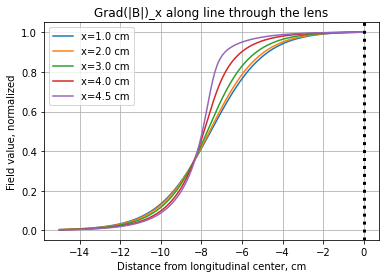

In [77]:
# Bnorm fringe field
xArr=np.asarray([.01,.02,.03,.04,.045])
for x in xArr:
    yPlot=BNorm_Along_Line(x)
    plt.plot(1e2*zArr,yPlot/yPlot[-1],label='x='+str(1e2*x)+' cm')
plt.title('Grad(|B|)_x along lines through the lens')
plt.xlabel('Distance from longitudinal center, cm')
plt.ylabel('Field value, normalized')
plt.grid()
plt.legend()
plt.axvline(x=0.0,c='black',linestyle=':',linewidth=3)
plt.show()

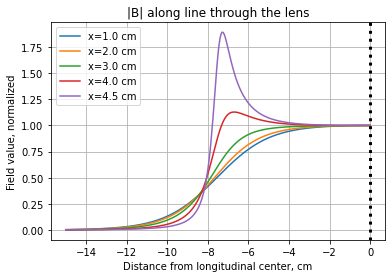

In [76]:
# Bnorm fringe field
xArr=np.asarray([.01,.02,.03,.04,.045])
for x in xArr:
    yPlot=BNormGrad_Along_Line(x)
    plt.plot(1e2*zArr,yPlot/yPlot[-1],label='x='+str(1e2*x)+' cm')
plt.title('|B| along lines through the lens')
plt.xlabel('Distance from longitudinal center, cm')
plt.ylabel('Field value, normalized')
plt.grid()
plt.legend()
plt.axvline(x=0.0,c='black',linestyle=':',linewidth=3)
plt.show()

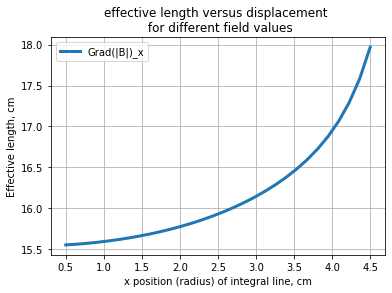

In [3]:
#make plot for the paper of the efective length

#plot of effective length for different metric
xArr=np.linspace(.005,.045,30)
yPlotBNormGrad=np.asarray([effectiveLength(x,'BNormGrad') for x in xArr])

plt.title('effective length versus displacement \n for different field values')
plt.plot(xArr*1e2,1e2*yPlotBNormGrad,label='Grad(|B|)_x',linewidth=3)
plt.xlabel('x position (radius) of integral line, cm')
plt.legend()
plt.ylabel('Effective length, cm')
plt.grid()
plt.show()

